<a href="https://colab.research.google.com/github/MauricioCastroF/VC1_EntregaTP/blob/main/TP1_PARTE_2_2_Castro_FrancoMauricio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/FIUBA-Posgrado-Inteligencia-Artificial/vision_computadora_I.git
!cd vision_computadora_I && git checkout 8va-cohorte

Cloning into 'vision_computadora_I'...
remote: Enumerating objects: 523, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 523 (delta 7), reused 32 (delta 7), pack-reused 488
Receiving objects: 100% (523/523), 156.95 MiB | 25.48 MiB/s, done.
Resolving deltas: 100% (161/161), done.
Branch '8va-cohorte' set up to track remote branch '8va-cohorte' from 'origin'.
Switched to a new branch '8va-cohorte'


In [2]:
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
cd vision_computadora_I/Material_TPs/TP1

/content/vision_computadora_I/Material_TPs/TP1


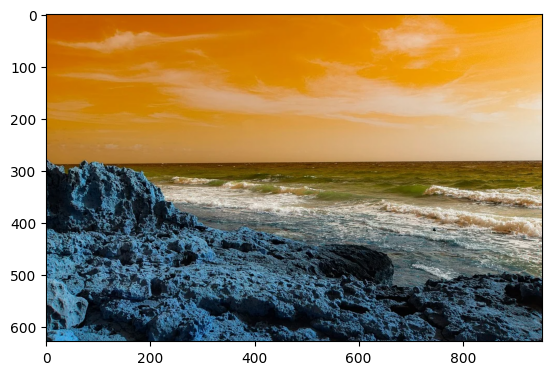

In [11]:
seg = cv.imread('segmentacion.png')

plt.imshow(seg)
plt.show()

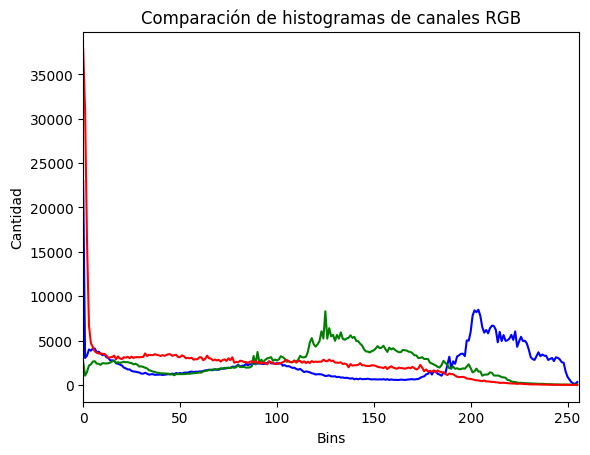

In [10]:
canales = cv.split(seg); colors = ("b", "g", "r")
plt.figure()
plt.title("Comparación de histogramas de canales RGB")
plt.xlabel("Bins")
plt.ylabel("Cantidad")

for (canales, color) in zip(canales, colors):
	# create a histogram for the current channel and plot it
	hist = cv.calcHist([canales], [0], None, [256], [0, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])

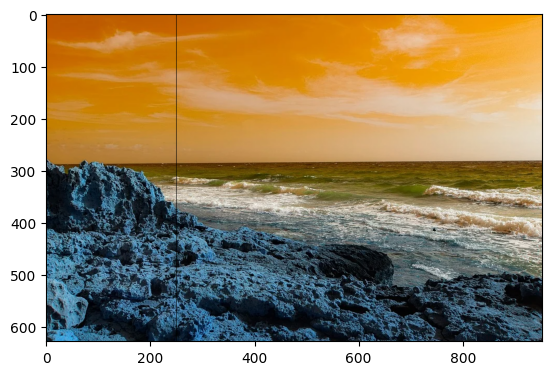

In [112]:
img_anotada = seg.copy()
img_anotada[:, 250]=0
plt.figure()
plt.imshow(img_anotada,cmap='gray')
plt.show()

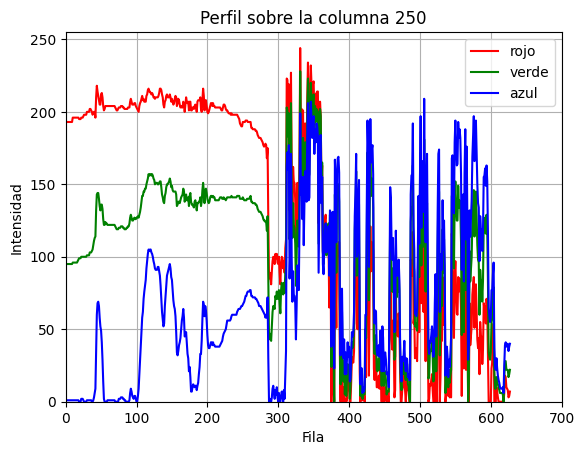

In [113]:
idx_col = 250
perfil_color = seg[:, idx_col]
plt.plot(perfil_color[:,0], color='r',label='rojo')
plt.plot(perfil_color[:,1], color='g',label='verde')
plt.plot(perfil_color[:,2], color='b',label='azul')
plt.xlabel('Fila')
plt.ylabel('Intensidad')
plt.title('Perfil sobre la columna {}'.format(idx_col))
plt.grid()
plt.xlim(0,700)
plt.ylim(0,255)
plt.legend()
plt.show()

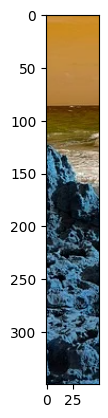

In [118]:
img_rgb = seg[200:550,200:250,:]
plt.figure()
plt.imshow(img_rgb)
plt.show()

In [119]:
color_mean = cv.mean(img_rgb)
print(color_mean)

(96.08211428571428, 94.09194285714285, 77.07645714285714, 0.0)


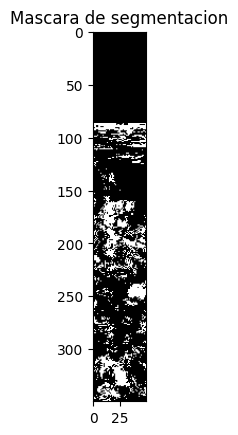

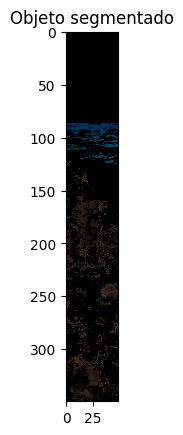

In [127]:
lim1 = np.array([10,0,0])
lim2 = np.array([96,94,77])

mask = cv.inRange(img_rgb, lim1, lim2)
seg2 = cv.bitwise_and(img_rgb, img_rgb, mask=mask)

plt.figure()
plt.title('Mascara de segmentacion')
plt.imshow(mask, cmap='gray')
plt.show()

plt.figure()
plt.imshow(seg2[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()